In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from skbio.stats.ordination import rda

In [4]:
df=pd.read_excel('Diversidad Hospital_merge_HPy.xlsx', sheet_name='MERGE')
df

,taxlevel,taxon,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,...,CO-S,TR-S,PR-S,total,dominio,phylo,clase,orden,familia,genero
0,0,Root,24726.0,45269.0,34453.0,15626.0,25580.0,43204.0,33321.0,57900.0,...,15156.0,11068.0,12593.0,473916.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bacteria,24726.0,45269.0,34453.0,15626.0,25580.0,43204.0,33321.0,57900.0,...,15156.0,11068.0,12593.0,473916.0,Bacteria,NaN,NaN,NaN,NaN,NaN
2,2,Acidobacteria,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,...,30.0,144.0,137.0,2060.0,Bacteria,Acidobacteria,NaN,NaN,NaN,NaN
3,3,Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,Bacteria,Acidobacteria,Acidobacteria_unclassified,NaN,NaN,NaN
4,4,Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,Bacteria,Acidobacteria,Acidobacteria_unclassified,Acidobacteria_unclassified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,6,Mollicutes_RF39_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Tenericutes,Mollicutes,Mollicutes_RF39,Mollicutes_RF39_fa,Mollicutes_RF39_ge
1211,4,Opitutales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,NaN,NaN
1212,5,Puniceicoccaceae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,Puniceicoccaceae,NaN
1213,6,Puniceicoccaceae_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,Puniceicoccaceae,Puniceicoccaceae_ge


In [9]:
tax6= df[df.taxlevel==6]
tax6 = tax6.fillna(0)
del tax6['taxlevel']
del tax6['total']
del tax6['dominio']
del tax6['phylo']
del tax6['clase']
del tax6['orden']
del tax6['familia']
del tax6['genero']
tax6 = tax6.set_index('taxon')
tax6

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
meta=pd.read_excel('metadatos_graci2.xlsx', sheet_name='METADATOS')

In [12]:
del meta['Muestra tipo']
del meta['SUM Python merge']
del meta['Ventilación']
del meta['Tipo zona']
del meta['Zona']
del meta['Initial number of sequences']
del meta['% of removed chimera']
del meta['Secuencias antes de restar negativos']
del meta['Sequences final number']
del meta['Number of OTUs']
meta = meta.set_index('Name')
meta

,Tª,H. relativa,"Particulas 0,3 m",Chao-1,Shannon H Index,Simpson Index
Name,,,,,,
CO-A,23.6,51.4,49555,59.00,2.731,0.9140
CO-S,23.6,51.4,49555,126.00,3.185,0.8803
EH-A,23.6,48.1,51952,71.50,2.662,0.8765
EH-S,23.6,48.1,51952,57.75,2.924,0.9159
ICU-CO-A,24.9,50.1,134665,51.17,3.014,0.9364
ICU-CO-S,24.9,50.1,134665,422.80,4.415,0.9668
ICU-PR1-A,25.8,49.5,35430,398.00,2.608,0.9785
ICU-PR1-S,25.8,49.5,35430,254.00,2.254,0.6584
ICU-PR2-A,24.8,45.9,25311,39.50,4.483,0.9070


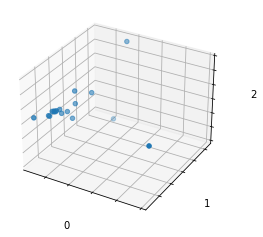

In [14]:
rda(tax6.T, meta,scaling=2)